## Importing Libraries
Contains some basic data preprocessing and visulization libraries.

In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
from sklearn import preprocessing
import itertools
import tensorflow as tf
%matplotlib inline
print(os.listdir("../input"))

['loan.xlsx', 'Data_Dictionary.xlsx']


## Importing Dataset

In [2]:
df = pd.read_excel("../input/loan.xlsx")
sol = pd.read_excel("../input/Data_Dictionary.xlsx")
# Best to save a copy in case data gets corrupted
df_copy = df.copy()

In [3]:
# Get idea of genral structre of dataet
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,NaN,NaN,3,0,13648,0.837,9,f,0.00,0.00,5863.155187,5833.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,1999-04-01,5,NaN,NaN,3,0,1687,0.094,4,f,0.00,0.00,1008.710000,1008.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,NaN,NaN,2,0,2956,0.985,10,f,0.00,0.00,3005.666844,3005.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,1996-02-01,1,35.0,NaN,10,0,5598,0.210,37,f,0.00,0.00,12231.890000,12231.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,1996-01-01,0,38.0,NaN,15,0,27783,0.539,38,f,524.06,524.06,3513.330000,3513.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Getting details which can't be seen directly by structre
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: datetime64[ns](5), float64(76), int64(13), object(17)
memory usage: 33.6+ MB


In [5]:
# Checking all the null and NaN values in dataset
print(df.isnull().sum().value_counts())

39717    54
0        43
56        2
12        1
25682     1
71        1
36931     1
697       1
1075      1
50        1
38577     1
39        1
2459      1
12940     1
2         1
dtype: int64


In [6]:
#Columns Details
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
# Removing useless coloumns
df.drop(['emp_title', 'desc', 'zip_code', 'url', 'title'], axis=1, inplace=True)

In [8]:
# Basic details about loan
print(df['loan_amnt'].describe())
print('----------------------------------------------------------------------------------------------------------')
print(df['funded_amnt'].describe())

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
----------------------------------------------------------------------------------------------------------
count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


## Observations
- Now we have to check the relation b/w the the requested amounts and the people who are been allocated these amounts
- Relation b/w the interest rates

Text(0.5, 1.0, 'Amount Funded')

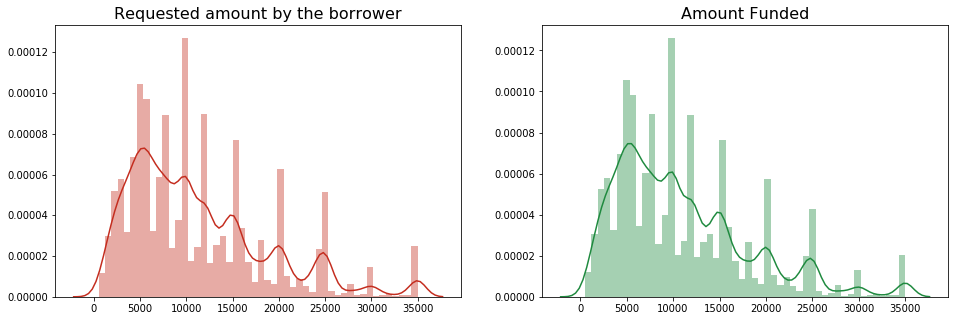

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))


loan_amount = df["loan_amnt"].values
funded_amount = df["funded_amnt"].values

sns.distplot(loan_amount, ax=ax[0], color="#c42d1f")
ax[0].set_title("Requested amount by the borrower", fontsize=16)
sns.distplot(funded_amount, ax=ax[1], color="#1F8A3F")
ax[1].set_title("Amount Funded", fontsize=16)

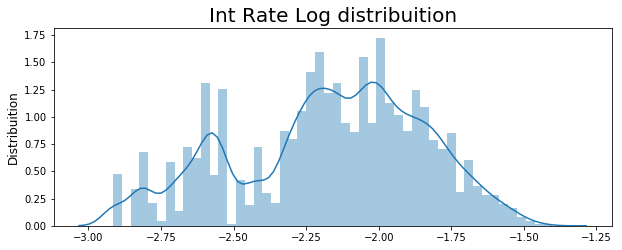

In [10]:
# intrest rate distribution
df['int_round'] = df['int_rate'].round(0).astype(int)

plt.figure(figsize = (10,8))

#Exploring the Int_rate
plt.subplot(211)
g = sns.distplot(np.log(df["int_rate"]))
g.set_xlabel("", fontsize=12)
g.set_ylabel("Distribuition", fontsize=12)
g.set_title("Int Rate Log distribuition", fontsize=20)

plt.show()

## Observations
- We have figured out the relation b/w the reqursted amount and the funded amount
- Now we have to check the relation b/w loan status and the funded amount by the company

In [11]:
# Getting info about 
print('Types:\t', df["loan_status"].unique())
print('----------------------------------------------------------------------------------------------------------\n')
print('Distribution:\n\n',df["loan_status"].describe())
print('----------------------------------------------------------------------------------------------------------\n')
print('No. of bad loans present:\t',df.loan_status.str.contains(r'Charged Off').sum())
print('Percentage of bad loans:\t',(df.loan_status.str.contains(r'Charged Off').sum()/39717)*100)

Types:	 ['Fully Paid' 'Charged Off' 'Current']
----------------------------------------------------------------------------------------------------------

Distribution:

 count          39717
unique             3
top       Fully Paid
freq           32950
Name: loan_status, dtype: object
----------------------------------------------------------------------------------------------------------

No. of bad loans present:	 5627
Percentage of bad loans:	 14.167736737417227


## Observation
- Now we have to observe the similarities beetween the bad loans.


## Factors causing bad loans
- Low credit score
- High debt to income
- Low annual income 
- High interest rates

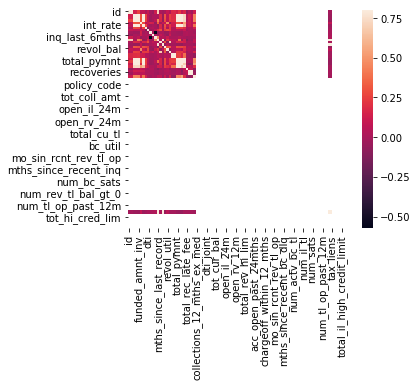

In [12]:
#correlation matrix
df_correlations = df.corr()
# f, ax = plt.subplots(figsize=(12, 10))
# sns.heatmap(corrmat, vmax=.8, square=True);



trace = go.Heatmap(z=df_correlations.values,
                   x=df_correlations.columns,
                   y=df_correlations.columns,
                  colorscale=[[0.0, 'rgb(165,0,38)'], 
                              [0.1111111111111111, 'rgb(215,48,39)'], 
                              [0.2222222222222222, 'rgb(244,109,67)'], 
                              [0.3333333333333333, 'rgb(253,174,97)'], 
                              [0.4444444444444444, 'rgb(254,224,144)'], 
                              [0.5555555555555556, 'rgb(224,243,248)'], 
                              [0.6666666666666666, 'rgb(171,217,233)'], 
                              [0.7777777777777778, 'rgb(116,173,209)'], 
                              [0.8888888888888888, 'rgb(69,117,180)'], 
                              [1.0, 'rgb(49,54,149)']],
            colorbar = dict(
            title = 'Level of Correlation',
            titleside = 'top',
            tickmode = 'array',
            tickvals = [-0.52,0.2,0.95],
            ticktext = ['Negative Correlation','Low Correlation','Positive Correlation'],
            ticks = 'outside'
        )
                  )


layout = {"title": "Correlation Heatmap"}
sns.heatmap(df_correlations, vmax=.8, square=True);
# data=[trace]

# fig = dict(data=data, layout=layout)
# iplot(fig, filename='labelled-heatmap')

## Observations
- By analyzing the heatmap we can see the garbage/insignificiant data which would be removed in establishment of a neural network

# Neural Network
The things observed by the visulization will be used here

In [13]:
df['Default_Binary'] = int(0)
for index, value in df.loan_status.iteritems():
    if value == 'Default':
        df.set_value(index,'Default_Binary',int(1))
    if value == 'Charged Off':
        df.set_value(index, 'Default_Binary',int(1))
    if value == 'Late (31-120 days)':
        df.set_value(index, 'Default_Binary',int(1))    
    if value == 'Late (16-30 days)':
        df.set_value(index, 'Default_Binary',int(1))
    if value == 'Does not meet the credit policy. Status:Charged Off':
        df.set_value(index, 'Default_Binary',int(1))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [14]:
df['Purpose_Cat'] = int(0) 
for index, value in df.purpose.iteritems():
    if value == 'debt_consolidation':
        df.set_value(index,'Purpose_Cat',int(1))
    if value == 'credit_card':
        df.set_value(index, 'Purpose_Cat',int(2))
    if value == 'home_improvement':
        df.set_value(index, 'Purpose_Cat',int(3))    
    if value == 'other':
        df.set_value(index, 'Purpose_Cat',int(4))    
    if value == 'major_purchase':
        df.set_value(index,'Purpose_Cat',int(5))
    if value == 'small_business':
        df.set_value(index, 'Purpose_Cat',int(6))
    if value == 'car':
        df.set_value(index, 'Purpose_Cat',int(7))    
    if value == 'medical':
        df.set_value(index, 'Purpose_Cat',int(8))   
    if value == 'moving':
        df.set_value(index, 'Purpose_Cat',int(9))    
    if value == 'vacation':
        df.set_value(index,'Purpose_Cat',int(10))
    if value == 'house':
        df.set_value(index, 'Purpose_Cat',int(11))
    if value == 'wedding':
        df.set_value(index, 'Purpose_Cat',int(12))    
    if value == 'renewable_energy':
        df.set_value(index, 'Purpose_Cat',int(13))     
    if value == 'educational':
        df.set_value(index, 'Purpose_Cat',int(14))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/opt/conda/lib/python3.6/site-packages/ip

In [15]:
df_train = pd.get_dummies(df.purpose).astype(int)

df_train.columns = ['debt_consolidation','credit_card','home_improvement',
                     'other','major_purchase','small_business','car','medical',
                     'moving','vacation','house','wedding','renewable_energy','educational']

# Also add the target column we created at first
df_train['Default_Binary'] = df['Default_Binary']
df_train.head()

,debt_consolidation,credit_card,home_improvement,other,major_purchase,small_business,car,medical,moving,vacation,house,wedding,renewable_energy,educational,Default_Binary
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [16]:
x = np.array(df.int_rate.values).reshape(-1,1) 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df['int_rate_scaled'] = pd.DataFrame(x_scaled)
print (df.int_rate_scaled[0:5])

0    0.272822
1    0.513824
2    0.549817
3    0.420970
4    0.379238
Name: int_rate_scaled, dtype: float64


In [17]:
x = np.array(df.funded_amnt.values).reshape(-1,1) 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df['funded_amnt_scaled'] = pd.DataFrame(x_scaled)
print (df.funded_amnt_scaled[0:5])

0    0.130435
1    0.057971
2    0.055072
3    0.275362
4    0.072464
Name: funded_amnt_scaled, dtype: float64


In [18]:
df_train['int_rate_scaled'] = df['int_rate_scaled']
df_train['funded_amnt_scaled'] = df['funded_amnt_scaled']

In [19]:
training_set = df_train[0:23000] # Train on first 500k rows
testing_set = df_train[23001:30000] # Test on next 400k rows
prediction_set = df_train[30001:] # Predict on final ~87k rows

COLUMNS = ['debt_consolidation','credit_card','home_improvement',
           'other','major_purchase','small_business','car','medical',
           'moving','vacation','house','wedding','renewable_energy','educational',
           'funded_amnt_scaled','int_rate_scaled','Default_Binary']   

FEATURES = ['debt_consolidation','credit_card','home_improvement',
           'other','major_purchase','small_business','car','medical',
           'moving','vacation','house','wedding','renewable_energy','educational',
           'funded_amnt_scaled','int_rate_scaled'] 

#CONTINUOUS_COLUMNS = ['funded_amnt_scaled','int_rate_scaled'] 
#CATEGORICAL_COLUMNS = ['Purpose_Cat']

LABEL = 'Default_Binary'

def input_fn(data_set):
    ### Simple Version ######
    feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES} # Working method for continous data DO NOT DELETE 
    labels = tf.constant(data_set[LABEL].values)
    return feature_cols, labels

In [20]:
learning_rate = 0.01
feature_cols = [tf.contrib.layers.real_valued_column(k)
              for k in FEATURES]
#config = tf.contrib.learn.RunConfig(keep_checkpoint_max=1) ######## DO NOT DELETE
regressor = tf.contrib.learn.DNNRegressor(
                    feature_columns=feature_cols,
                    optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate),
                    hidden_units=[10, 20, 10], )

regressor.fit(input_fn=lambda: input_fn(training_set), steps=500)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



DNNRegressor(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x7ff67fa85a90>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='debt_consolidation', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='credit_card', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='home_improvement', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='other', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='major_purchase', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='small_business', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='car', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(col

In [21]:
# Score accuracy
ev = regressor.evaluate(input_fn=lambda: input_fn(testing_set), steps=1)
loss_score = ev["loss"]
print("Loss: {0:f}".format(loss_score))

Loss: 0.120062


In [22]:
y = regressor.predict(input_fn=lambda: input_fn(prediction_set))
predictions = list(itertools.islice(y, 87378))


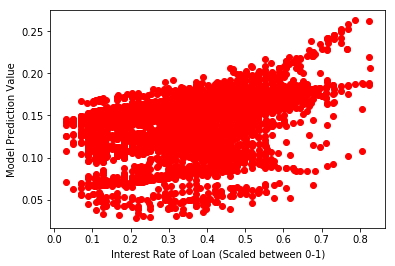

In [23]:
plt.plot(prediction_set.int_rate_scaled, predictions, 'ro')
plt.ylabel("Model Prediction Value")
plt.xlabel("Interest Rate of Loan (Scaled between 0-1)")
plt.show()

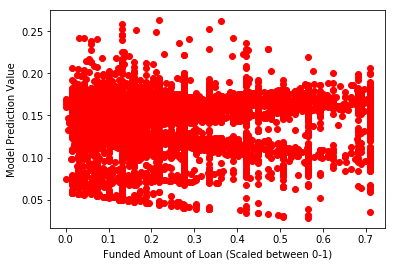

In [24]:
plt.plot(prediction_set.funded_amnt_scaled, predictions, 'ro')
plt.ylabel("Model Prediction Value")
plt.xlabel("Funded Amount of Loan (Scaled between 0-1)")
plt.show()